In [5]:
from math import sqrt
import random
import copy
import os
import time
import pickle

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

#environment
import gym
import pybullet
import pybulletgym.envs
import pybullet_envs


#pytorch
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import TD3

# device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if torch.cuda.is_available():
    print('Using device:', torch.cuda.get_device_name(0))
else:
    print('Using device:', device)

Using device: GeForce GTX 1050


In [19]:
env_name =  'Walker2d-v2'
env = gym.make(env_name)

policy = torch.load("./TD3_Walker2d-v2_0.pt")

RANDOM_SEED = 0

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

<function matplotlib.pyplot.gcf()>

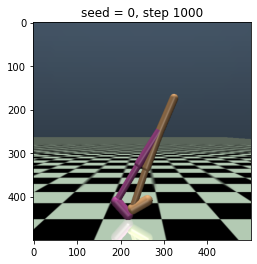

4.3369694822297475


In [20]:
state = env.reset()
env.seed(RANDOM_SEED)
env.action_space.seed(RANDOM_SEED)

total_reward = 0
step = 0
done = False

plt.figure()
t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
plt.imshow(env.render(mode='rgb_array'))
display.clear_output(wait=True)
display.display(plt.gcf)
plt.title(t)
plt.savefig("frames/" + t.replace(':', ' - '), dpi=150)
plt.show()
while not done:
    # env.env._cam_dist=1
    # env.env._cam_pitch=-90
    #action = policy.actor(torch.FloatTensor(state).to(device)).detach().cpu().squeeze().numpy()
    action = policy.select_action(np.array(state))
    next_state, reward, done, _ = env.step(action)
    state = next_state
    step += 1
    total_reward += reward
    
    plt.figure()
    t = 'seed = {}, step {}'.format(RANDOM_SEED, step)
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf)
    plt.title(t)
    plt.savefig("frames/" + t.replace(':', ' - ') + ".png", dpi=150)
    plt.show()

print(total_reward / step)